# Importing the modules/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")

# Read the DataSet

In [2]:
employee_data = pd.read_csv("D:/GitHub_Projects/HR_Attrition_Prediction_for_IBM_data/HR-Employee-Attrition.csv")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleaning & Preprocessing

In [3]:
employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in this dataset.

# Exploratory Data Analysis

In [4]:
employee_data.shape

(1470, 35)

In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_data.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

These are the categorical columns in Dataset

In [7]:
employee_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
# let's encode the attrition column so we can use it for EDA
employee_data['Attrition'] = employee_data['Attrition'].factorize(['No','Yes'])[0]
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Attrition: No = 0 Yes = 1

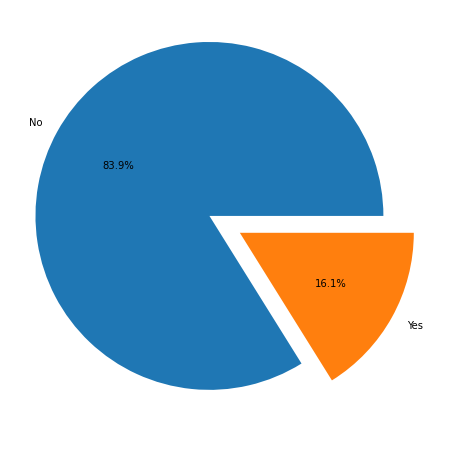

In [9]:
plt.figure(figsize=(8,8))
pie = employee_data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

84% of the employees in the dataset have not left the company.

In [10]:
employee_data.select_dtypes(include=['int64']).dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

These are the numerical columns in Dataset

<AxesSubplot:xlabel='Age', ylabel='Density'>

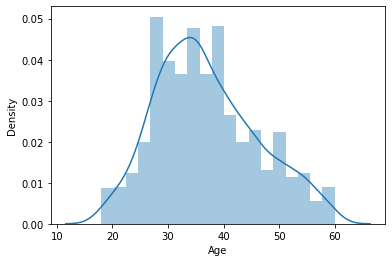

In [11]:
sb.distplot(employee_data["Age"])

In [12]:
employee_data[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [13]:
employee_data[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

Most employees are in their 30s with 35 year olds having the highest count and lowest are people at around the age 60 or less than 20.

In [14]:
employee_data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [15]:
employee_data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<AxesSubplot:>

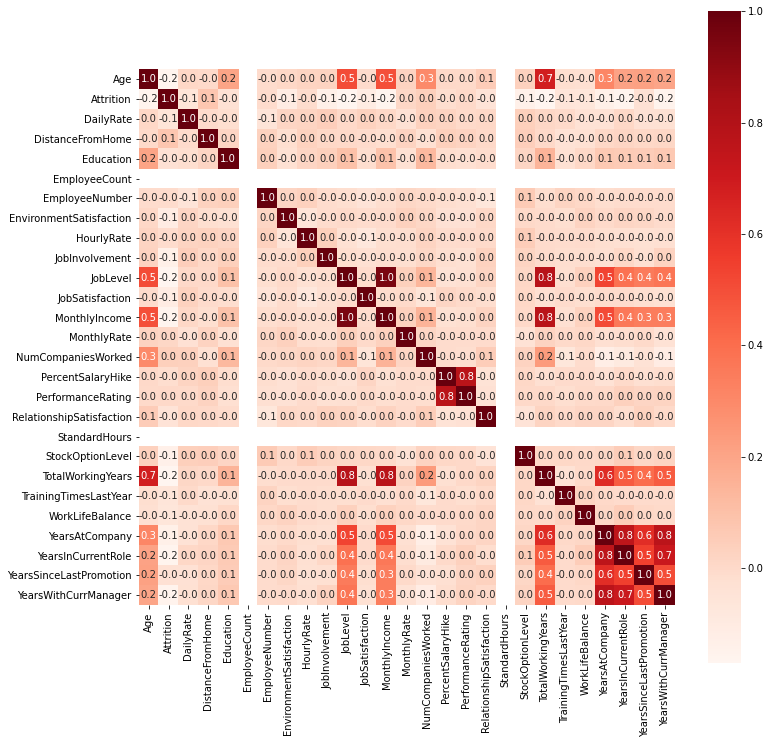

In [16]:
corr = employee_data.corr()
plt.figure(figsize=(12,12))
sb.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

<AxesSubplot:xlabel='YearsAtCompany'>

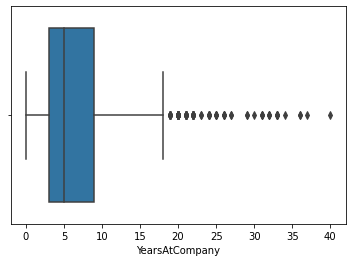

In [17]:
sb.boxplot(employee_data["YearsAtCompany"])

Most employees remain in the company for 3-9 years with median being 5 years.

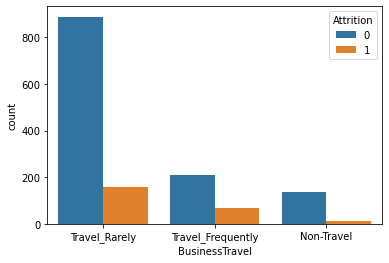

In [18]:
sb.countplot(x='BusinessTravel', hue='Attrition', data=employee_data);

Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.

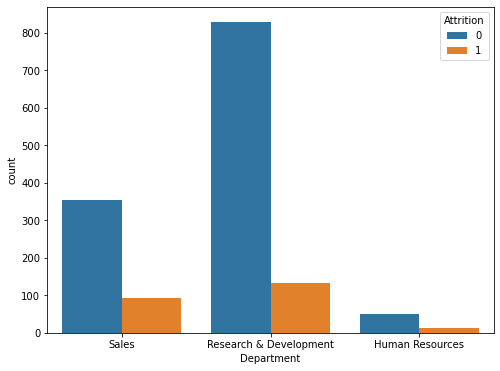

In [19]:
plt.figure(figsize=(8,6))
sb.countplot(x='Department', hue='Attrition', data=employee_data);

In [20]:
employee_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Most attritions are from the research & development department only for sales department to come second by a small margin. HUman resources has the least number of attritions. But we need to keep in mind that R&D has a lot more employees than sales and HR.

If we considered percentage of attritions per department, we would see that the HR department has most attritions.

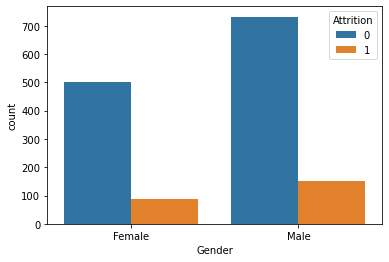

In [21]:
sb.countplot(x='Gender', hue='Attrition', data=employee_data);

Clearly there are more males in the organisation than females, so attritions are higher but slightly. I don't think gender is too significant a factor behind attritions.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

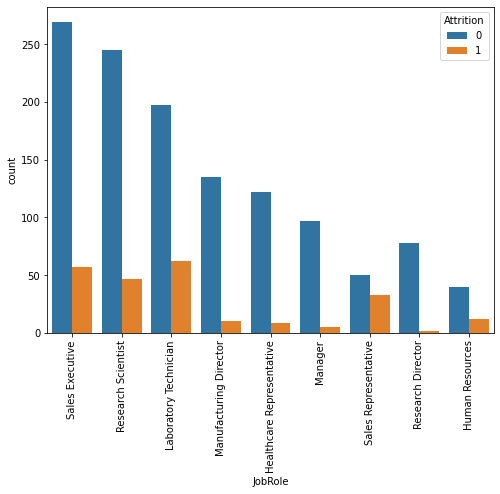

In [22]:
plt.figure(figsize=(8,6))
sb.countplot(x='JobRole', hue='Attrition', data=employee_data);
plt.xticks(rotation=90)

Among job roles, most laboratory technicians have departed from their jobs, only for research scientists, sales executives and sales representatives (% wise) to trail behind. We could look into salaries of each job roles and see if that may be the reason.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

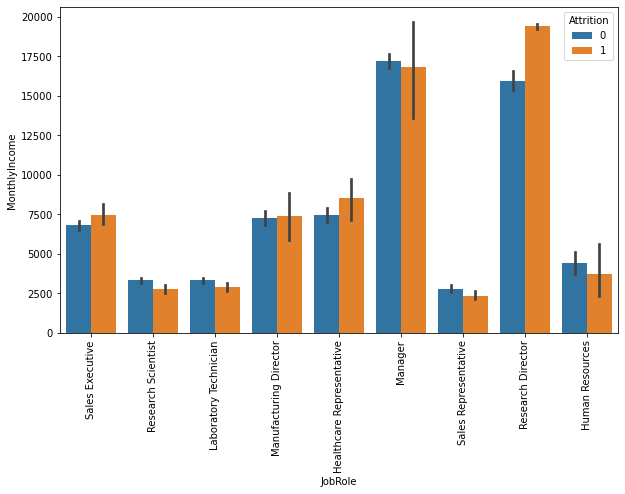

In [23]:
plt.figure(figsize=(10,6))
sb.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=employee_data)
plt.xticks(rotation=90)

As doubted, laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.

Also, as we had seen earlier, the HR department had the most attritions and we can see they have very low salaries as well so once again, this is something to think about.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

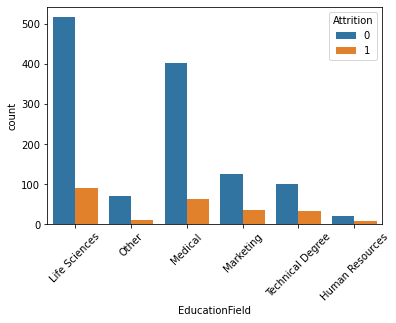

In [24]:
sb.countplot(x='EducationField', hue='Attrition', data=employee_data);
plt.xticks(rotation=45)

I don't think the degrees of employees really matter here as most of the number of attritions are similar.

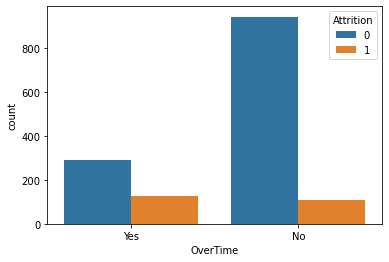

In [25]:
sb.countplot(x='OverTime', hue='Attrition', data=employee_data);

Overtime hours aren't a very crucial factor either.

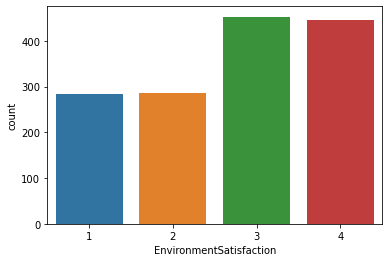

In [26]:
sb.countplot(x='EnvironmentSatisfaction', data=employee_data);

Most employees seem to be satisfied with the working environment.

# Train and Test Splits

In [27]:
# Separating the features from the target (In the process, we will drop features that we don't think are key factors.)
X = employee_data.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1) # Features
y = employee_data['Attrition'] # Target

In [28]:
# Label encoding the categorical variables

X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

In [29]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [30]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [31]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 31)
(1176, 31)
(294, 31)


# Create a Model

I will build three different models - Random Forest, Logistic Regression and SVM for this classification problem.

In [32]:
models = [] # ML Models
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("SVM", svm.SVC(kernel='linear')))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    
    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)
    
    # Fitting the Model
    model.fit(X_train,y_train)
    
    # Model Predictions and Finding Accuracy
    train_pred = model.predict(X_train)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_test)
    Test_score = accuracy_score(test_pred,y_test)
    
    results.append(cv_results)
    
    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")

Testing model: Random Forest
Cross_Val Mean: 0.7997680373789862, Training Accuracy: 1.0, Testing Accuracy: 0.8435374149659864

Testing model: Logistic Regression
Cross_Val Mean: 0.8219775205615518, Training Accuracy: 0.8656462585034014, Testing Accuracy: 0.8571428571428571

Testing model: SVM
Cross_Val Mean: 0.7660141990060427, Training Accuracy: 0.8392857142857143, Testing Accuracy: 0.8367346938775511



Average cross-validation score for all three models are quite similar and relatively high.

But interestingly, we can see that a random forest model gives 100% accuracy while the other two are ~85% accurate for the training data. However, for the testing data, all the models give ~ 85% accuracy while the logistic Regression model predicts most accurately.